https://s3.amazonaws.com/MLMastery/machine_learning_algorithms_from_scratch_sample.pdf?__s=8nrqbeq78m1rd19f6q7z

In [2]:
from IPython.display import HTML as html_print, display

In [3]:
# Example of Calculating Coefficients
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y    
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])


# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [4]:
# calculate coefficients
dataset1 = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset1)
#print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))


display(html_print("<h1>$$ y=f(x)=ax+b => y = f(x) = %.1f  x  %s  %.1f$$</h1>" % (b1, '+' if b0>0 else '', b0)))

In [5]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,9)

In [6]:
def plot_train_test_pred(train,test,pred):
    # Plot the data

    # plot train
    x = [r[0] for r in train]
    y = [r[1] for r in train]
    fig, ax = plt.subplots()
    ax.plot(x, y,'o', color='red', label='Train')
    
    # plot test
    x = [r[0] for r in test]
    y = [r[1] for r in test]    
    ax.plot(x, y, 's',color='black', label='Test')

    # plot pred
    x = [r[0] for r in pred]
    y = [r[1] for r in pred]    
    ax.plot(x, y,'-x', color='blue', label='Pred')
    
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('C0')    
    # Show the plot    
    plt.show()

In [7]:
# Example of Simple Linear Regression on the Swedish Insurance Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Split a dataset into a train and test set
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    
    
    plot_train_test_pred(train,test, [[x[0],y] for x,y in zip(test_set,predicted)])
    
    print("R2:",r_squared(test, predicted))
    
    return rmse

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

# Implementado por Luciano para testar as duas formas de se calcular o R^2
def r_squared(test, predic):
    """https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o"""
    testt=[y[-1] for y in test]
    
    mean_t = mean(testt)
#    sq_tot = variance(testt,mean_t)
    sq_tot = sum([(y-mean_t)**2 for y in testt])
    sq_res = sum([(yt-yp)**2 for yt,yp in zip(testt, predic)])
#    sq_exp = variance(predic,mean_t)
    
    return 1 - sq_res/sq_tot
    

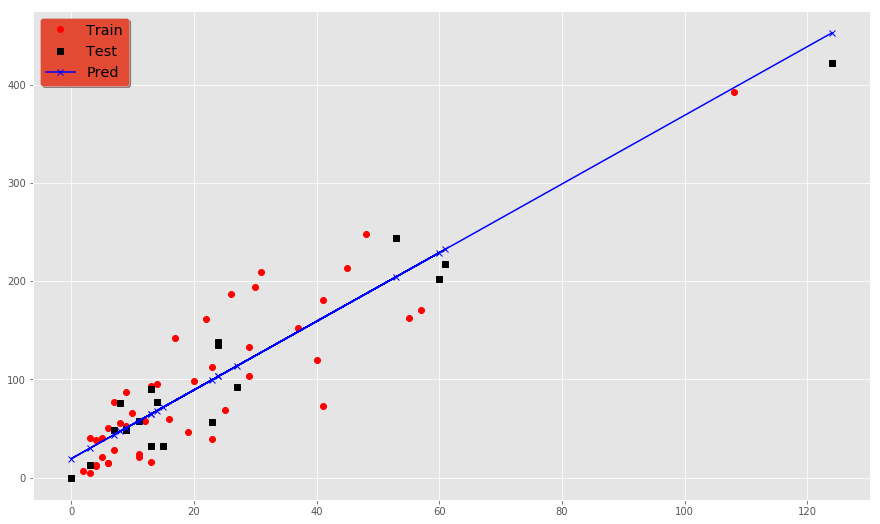

R2: 0.9311706119356815
RMSE: 26.723


In [16]:
# Simple linear regression on insurance dataset
#seed(1)
# load and prepare data
filename = 'W:\DataScience\datasets\insurance\insurance.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
    
# evaluate algorithm
split = 0.70
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

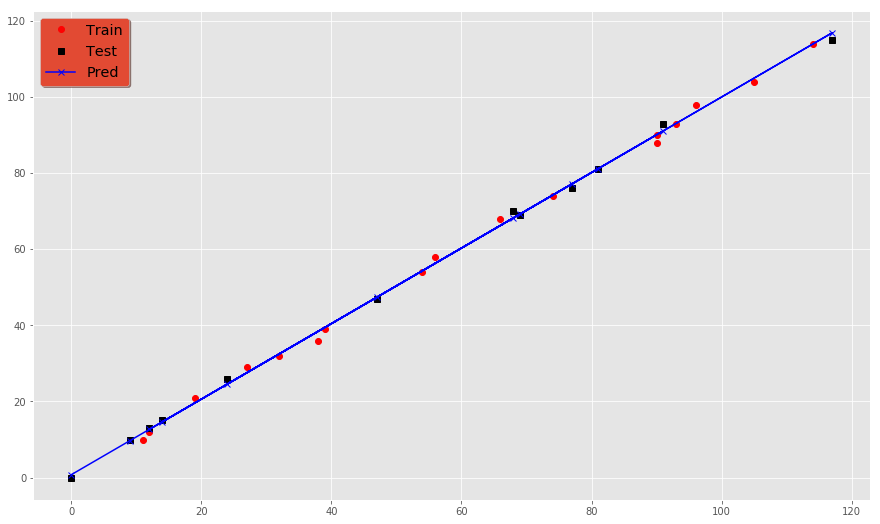

R2: 0.9990523479355801
RMSE: 1.115


In [18]:
split = .6
xx = np.random.randint(120, size=30)
yy = [ v + np.random.choice(range(-2,3))  for v in xx]
dataset2 = [[x,y] for x,y in zip(xx,yy )]
rmse = evaluate_algorithm(dataset2, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

In [21]:
[np.random.choice(range(-2,3)) for _ in range(20)]

[1, 2, -1, -1, 2, -2, -1, 0, 2, 0, -1, 0, 0, -2, -2, -2, 1, -1, -2, 2]

In [349]:
#load_csv('W:\DataScience\datasets\insurance\insurance.csv')

In [235]:
# Testes multigraficos 
# Multiple subplots with matplotlib
# https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html

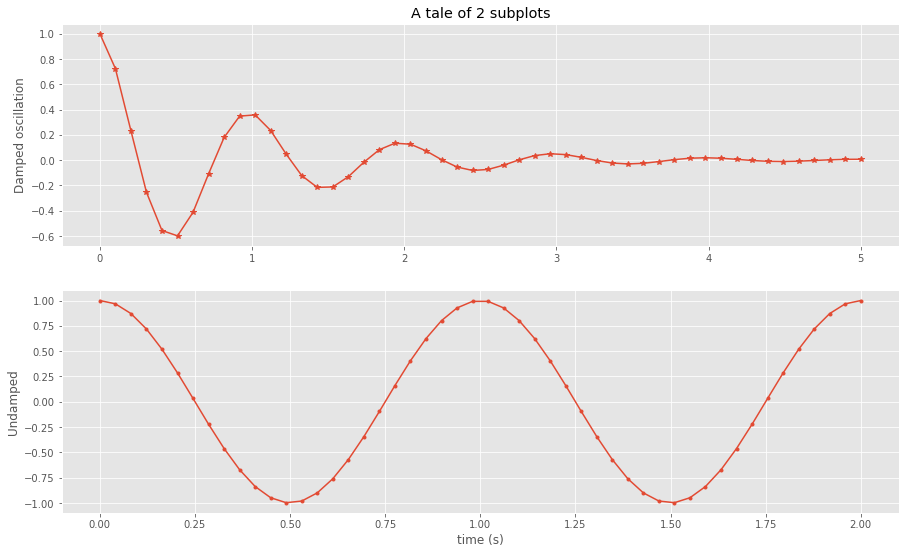

In [29]:
import numpy as np
#import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, '*-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()